<a href="https://colab.research.google.com/github/Ethan-sev/Airbnb_Score_Model/blob/main/Air_Learning_Clean_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# Import necessary libraries
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
!pip install --upgrade tensorflow
import seaborn as sns

Connect to google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read Cleaned CSV file

In [50]:
file_path = '/content/drive/MyDrive/Airbnb_Score_Model/Resources/airbnb_v3_encoded.csv'
df = pd.read_csv(file_path)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   log_price                      74111 non-null  float64
 1   accommodates                   74111 non-null  float64
 2   bathrooms                      74111 non-null  float64
 3   host_response_rate             74111 non-null  float64
 4   number_of_reviews              74111 non-null  float64
 5   bedrooms                       74111 non-null  float64
 6   beds                           74111 non-null  float64
 7   amenities                      74111 non-null  int64  
 8   cleaning_fee                   74111 non-null  int64  
 9   property_type_Bed & Breakfast  74111 non-null  int64  
 10  property_type_Boutique hotel   74111 non-null  int64  
 11  property_type_Bungalow         74111 non-null  int64  
 12  property_type_Cabin            74111 non-null 

Adust Bin Size to desired preference

Target and Features

In [52]:
y = df['rating_category']  # Target variable
X = df.drop(columns=['rating_category'])

In [53]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest, First Trial

In [59]:
cm = confusion_matrix(y_test, y_pred)

Showing Confusion Matrix

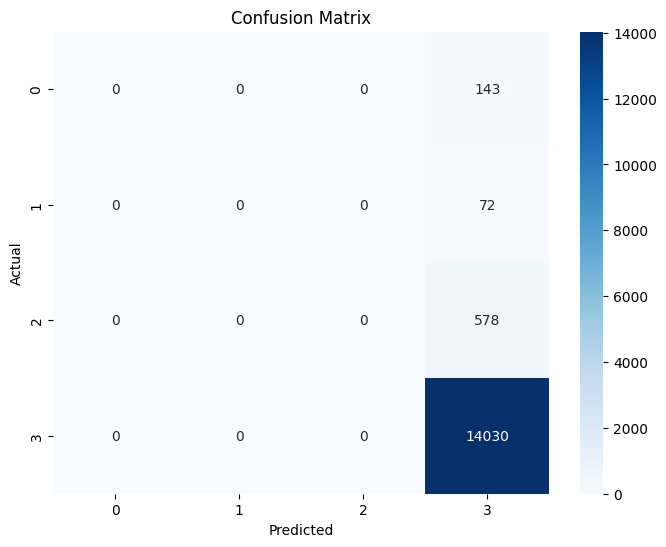

In [60]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<Axes: ylabel='Frequency'>

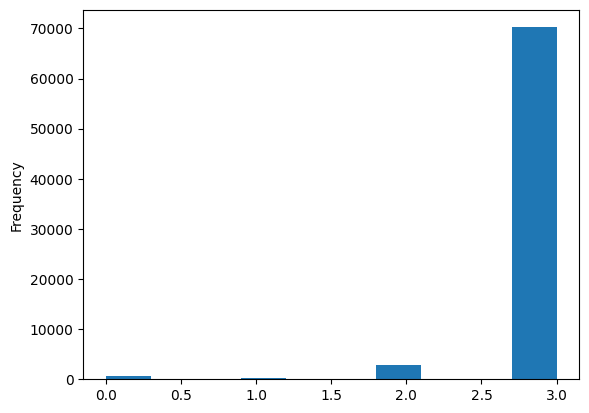

In [20]:
y.plot(kind= 'hist')

In [55]:
# Initialize the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
)


In [56]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [57]:
pd.Series(model.predict(X)).value_counts()

,count
3,74111


In [58]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed report
print(classification_report(y_test, y_pred))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       143
           1       0.00      0.00      0.00        72
           2       0.00      0.00      0.00       578
           3       0.95      1.00      0.97     14030

    accuracy                           0.95     14823
   macro avg       0.24      0.25      0.24     14823
weighted avg       0.90      0.95      0.92     14823

[[    0     0     0   143]
 [    0     0     0    72]
 [    0     0     0   578]
 [    0     0     0 14030]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Looking at Overfitting and Underfitting

In [25]:
# Evaluate on training data
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)

# Evaluate on test data
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9478983942787748
Test Accuracy: 0.9465020576131687


# **XG Boost Trial**


In [26]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 6.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [27]:
import xgboost as xgb

In [28]:
# Initialize the XGBoost model
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Train the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [29]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9465020576131687
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       143
           1       0.00      0.00      0.00        72
           2       0.50      0.00      0.01       578
           3       0.95      1.00      0.97     14030

    accuracy                           0.95     14823
   macro avg       0.36      0.25      0.24     14823
weighted avg       0.92      0.95      0.92     14823



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Neural Network

In [30]:
from tensorflow.keras import backend as K

# Clear session to reset model state
K.clear_session()

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Initialize the model
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# Add more hidden layers
model.add(Dense(32, activation='relu'))

# Add dropout layer
model.add(Dropout(0.5))

# Add output layer
model.add(Dense(4, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [35]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/50
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9301 - loss: 0.3454 - val_accuracy: 0.9465 - val_loss: 0.2366
Epoch 2/50
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9502 - loss: 0.2389 - val_accuracy: 0.9465 - val_loss: 0.2366
Epoch 3/50
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9477 - loss: 0.2352 - val_accuracy: 0.9465 - val_loss: 0.2328
Epoch 4/50
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9469 - loss: 0.2342 - val_accuracy: 0.9465 - val_loss: 0.2332
Epoch 5/50
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9487 - loss: 0.2269 - val_accuracy: 0.9465 - val_loss: 0.2322
Epoch 6/50
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9483 - loss: 0.2243 - val_accuracy: 0.9465 - val_loss: 0.2331
Epoch 7/50
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9472 - loss: 0.2278 - val_accuracy: 0.9465 - val_loss: 0.2322
Epoch 8/50
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9469 - loss: 0.2278 - 

In [36]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Test accuracy:", test_accuracy)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_classes = y_pred.argmax(axis=1)
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_classes))

Test accuracy: 0.9465695023536682
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       143
           1       0.00      0.00      0.00        72
           2       0.60      0.01      0.01       578
           3       0.95      1.00      0.97     14030

    accuracy                           0.95     14823
   macro avg       0.39      0.25      0.25     14823
weighted avg       0.92      0.95      0.92     14823



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Testing with different weights on each class

Making it an int to we can adust weights

In [37]:
y_train = np.array(y_train, dtype=int)
y_test = np.array(y_test, dtype=int)

Adust Weight, In order to help better recognize lower rated places

In [38]:
class_weights = {
    0: 150.0,
    1: 150.0,
    2: 20.0,
    3: 1.0
}

In [39]:
# Make predictions on the test set
y_pred_prob = model.predict(X_test_scaled)

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred_prob, axis=1)

464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [40]:
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       143
           1       0.00      0.00      0.00        72
           2       0.60      0.01      0.01       578
           3       0.95      1.00      0.97     14030

    accuracy                           0.95     14823
   macro avg       0.39      0.25      0.25     14823
weighted avg       0.92      0.95      0.92     14823



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
print("Unique classes in y_train:", np.unique(y_train))
print("Unique classes in y_test:", np.unique(y_test))

Unique classes in y_train: [0 1 2 3]
Unique classes in y_test: [0 1 2 3]


In [42]:
print("Unique classes in y_train:", np.unique(y_train))
print("Unique classes in y_test:", np.unique(y_test))

Unique classes in y_train: [0 1 2 3]
Unique classes in y_test: [0 1 2 3]


In [43]:
print("Class weights being used", class_weights)

Class weights being used {0: 150.0, 1: 150.0, 2: 20.0, 3: 1.0}


In [44]:
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with class weights
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1, class_weight=class_weights)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2336 - loss: 5.6438 - val_accuracy: 0.4547 - val_loss: 1.2552
Epoch 2/50
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4277 - loss: 4.9771 - val_accuracy: 0.5268 - val_loss: 1.2037
Epoch 3/50
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.4661 - loss: 4.8335 - val_accuracy: 0.4823 - val_loss: 1.1747
Epoch 4/50
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4470 - loss: 4.6754 - val_accuracy: 0.5191 - val_loss: 1.0692
Epoch 5/50
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4711 - loss: 4.4790 - val_accuracy: 0.4621 - val_loss: 1.1698
Epoch 6/50
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4669 - loss: 4.6140 - val_accuracy: 0.4535 - val_loss: 1.1537
Epoch 7/50
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4718 - loss: 4.4608 - val_accuracy: 0.4963 - val_loss: 1.1330
Epoch 8/50
1853/1853 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4881 - loss: 4.4537 - 

In [45]:
print("Classification Report:\n", classification_report(y_test, y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       143
           1       0.00      0.00      0.00        72
           2       0.60      0.01      0.01       578
           3       0.95      1.00      0.97     14030

    accuracy                           0.95     14823
   macro avg       0.39      0.25      0.25     14823
weighted avg       0.92      0.95      0.92     14823



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
